## Nexon Game Data Dive
### by Caleb Strait
My task was open-ended: to pull actionable insights from a large dataset containing KPI measurements for three games, Z Force, Ranger Danger, & Queen Bee. Purchases and concurrent user counts were recorded daily from 1/1/14 through 12/31/15.

#### The KPIs:
- **#_of_registrations**: new player registrations
- **max_ccu**: highest number of users that played the game at the same time
- **avg_ccu**: average number of users that played the game at the same time
- **#_of_unique_users**: number of unique players in the game
- **revenue**: amount of money (gross) spent by players in the game
- **#_of_paying users**: number of unique users who spent money in the game
- **paying_rate**: % of unique users who spent money in the game
- **arpu**: average revenue per user
- **arppu**: average revenue per paying user

### 1) Importing and Cleaning

In [1]:
### Import Python Modules ###
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

### Initialize Plotting for .ipynb ###
%matplotlib inline
plt.style.use('ggplot')

I received the data as a .xlsx ('Nexon America - Analytical Assignment.xlsx') with three tabs: game KPI measurements by day, by week, and by month. I converted the daily measurement tab into a .csv ('Daily_KPIs.csv') that I saved alongside this report. I began by loading this file, then checking for rows with missing values (finding none), stripping formatting, and making sure I had as many measurements as I expected:

In [2]:
### Load Data into a DataFrame ###
df = pd.read_csv('Daily_KPIs.csv')

### Dataset Cleaning ###
print('I\'m expecting:           ' + str(365 * 2 * 3) + ' rows of data') # daily measurements over 2 years with 3 games
print('Before cleaning I found: ' + str(len(df.index)) + ' rows of data')
df = df.dropna()
df.columns = df.columns.str.strip().str.replace(' ', '_') # format column labels
for column in df:
    seriesX = pd.Series(df[column])
    seriesX = seriesX.str.replace(',', '').str.replace('$', '').str.replace('%', '')
    df[column] = seriesX
print('After cleaning I had:    ' + str(len(df.index)) + ' rows of data')

### Create Table 1 ###
print('\nTable 1. First Day of Data (Cleaned)')
df.head(n=3)

I'm expecting:           2190 rows of data
Before cleaning I found: 2190 rows of data
After cleaning I had:    2190 rows of data

Table 1. First Day of Data (Cleaned)


,date,game,#_of_registrations,max_ccu,avg_ccu,#_of_unique_users,revenue,#_of_paying_users,paying_rate,arpu,arppu
0,1/1/14,Z Force,456,2531,1665,8455,7160,387,4.58,0.85,18.50
1,1/1/14,Ranger Danger,1529,6049,4390,19176,16057,1235,6.44,0.84,13.00
2,1/1/14,Queen Bee,219,4146,3576,11571,7410,232,2.01,0.64,31.94


### 2) Dataset Exploration

My goal is to find actionable insights for each game's developer, so I set out illustrating how each KPI was affected by the only independant variable available to me: time.

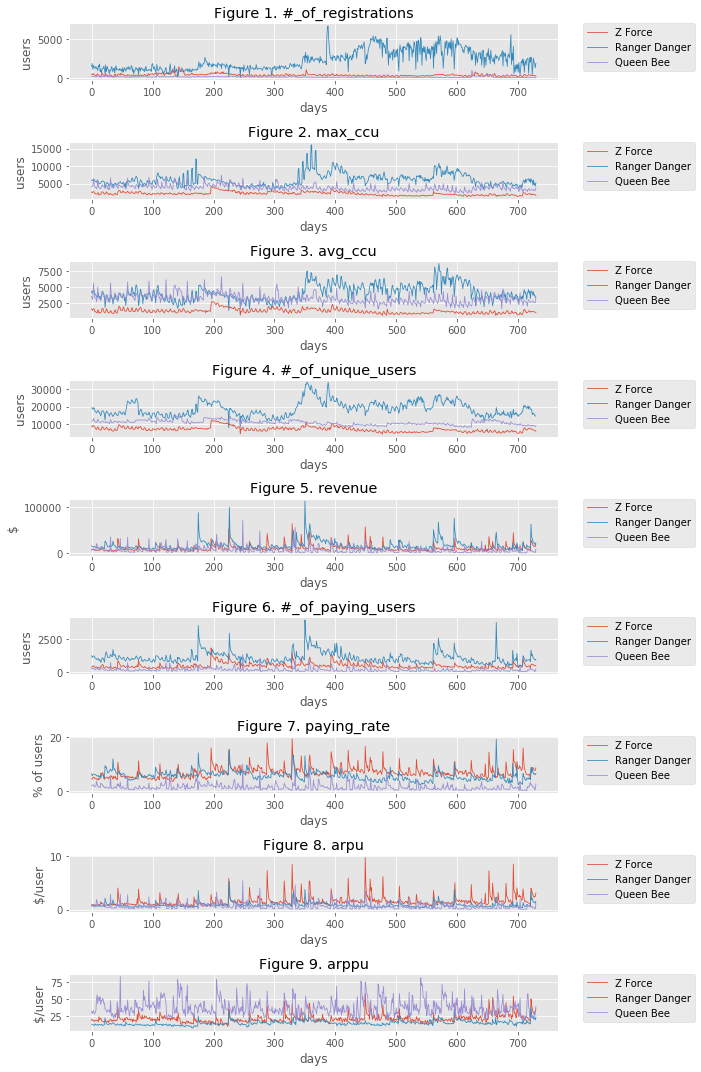

In [3]:
### Create Figures 1-9: KPIs over time ###
df_zfo = df[(df['game'] == 'Z Force')]
df_ran = df[(df['game'] == 'Ranger Danger')]
df_que = df[(df['game'] == 'Queen Bee')]
indeces = df.columns
units = ['users','users','users','users','$','users','% of users','$/user','$/user']
rng = range(2,len(indeces))
_, subplot = plt.subplots(len(rng),1,figsize=(8,15))
for i in rng:
    var_name = list(indeces)[i]
    yaxis1 = df_zfo[var_name].astype(float).tolist()
    yaxis2 = df_ran[var_name].astype(float).tolist()
    yaxis3 = df_que[var_name].astype(float).tolist()
    xaxis = range(0,len(yaxis1))
    subplot[i-2].plot(xaxis, yaxis1, label='Z Force',linewidth=.8)
    subplot[i-2].plot(xaxis, yaxis2, label='Ranger Danger',linewidth=.8)
    subplot[i-2].plot(xaxis, yaxis3, label='Queen Bee',linewidth=.8)
    subplot[i-2].set_title('Figure ' + str(i-1) + '. ' + str(var_name))
    subplot[i-2].set_xlabel('days')
    subplot[i-2].set_ylabel(units[i-2])
    subplot[i-2].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if i == 6:
        yax1_sec4 = yaxis1
        yax2_sec4 = yaxis2
        yax3_sec4 = yaxis3
        xax_sec4 = xaxis
plt.tight_layout()

#### Discussion
Most of the KPIs show a regular up and down modulation. Given more time, we could formally tease apart the overlap of various such cyclical effects with Fourier analysis. For now, Figure 3 is convincing enough to me that user engagement shows strong day of the week effects. Let's investigate further with a set of graphs, similar to these, but with days of the week on the x-axis.

### 3) Day of the Week Plots

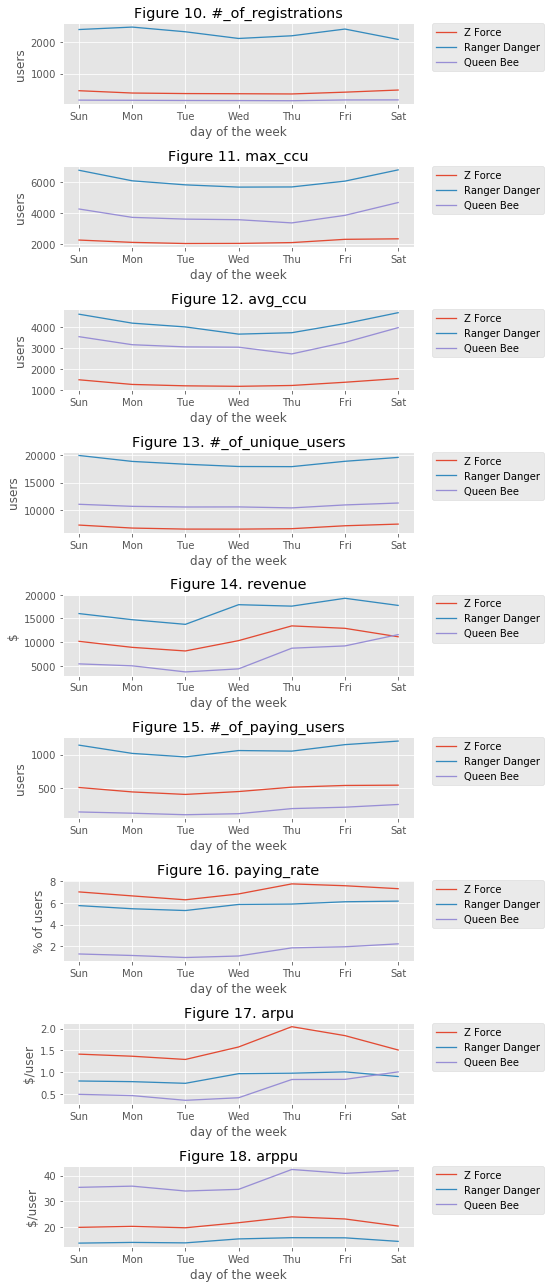

In [4]:
### Create Figures 10-18: KPIs by day of week ###
_, subplt = plt.subplots(len(rng),1,figsize=(6,18))
for i in rng:
    var_name = list(indeces)[i]
    y1 = df_zfo[var_name].astype(float).tolist()
    y2 = df_ran[var_name].astype(float).tolist()
    y3 = df_que[var_name].astype(float).tolist()
    yaxis1,yaxis2,yaxis3 = ([] for x in range(3))
    rngW = list(range(4,7)) + list(range(0,4)) # rearranging Sunday into first
    for j in rngW:
        yaxis1.append(np.mean(y1[j::7]))
        yaxis2.append(np.mean(y2[j::7]))
        yaxis3.append(np.mean(y3[j::7]))
    xaxis = range(0,len(yaxis1))
    s = subplt[i-2]
    s.plot(xaxis, yaxis1, label='Z Force',linewidth=1.3)
    s.plot(xaxis, yaxis2, label='Ranger Danger',linewidth=1.3)
    s.plot(xaxis, yaxis3, label='Queen Bee',linewidth=1.3)
    s.set_title('Figure ' + str(i+8) + '. ' + str(var_name))
    s.set_xlabel('day of the week')
    s.set_ylabel(units[i-2])
    s.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    s.set_xticks(range(0,7))
    s.set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
plt.tight_layout()

#### Day of the Week Effects
max_ccu, avg_ccu, #_of_unique_users, and #_of_paying_users (Figs 11-13,15) are all counts of concurrent users. The u-curve between Sunday and Saturday means players play the most on weekends, which makes sense: fewer of them are working then. Meanwhile revenue, paying_rate, arpu, and arppu (Figs 14,16-18) are all user spending measures. These curves noticably peak on Thursday, presumably in anticipation of the weekend and payday.

#### Games' Strengths
This batch of figures also clarifies the different strengths and weaknesses of these games among this set of KPIs. With our help identifying for our developers which other developers might have a particularly good grasp on particular aspects of F2P game monetization, our developers might very realistically be able to mimic each other's strengths.
- Z Force tops the others in paying_rate (Fig 16). Maybe its developers have sharable insights into how to monetize players at this superior rate.
- Ranger Danger has a far higher registration rate than then other games, so while it may be in a popular genre, it may also have particularly attractive advertising materials on digital storefronts that other developers could study. The user count curves (Figs 11-13,15) are also useful as comparisons of overall engagement. Ranger Danger is the most popular by these metrics as well.
- Dispite having the lowest average revenue per user (Fig 17), Queen Bee boasts the highest average revenue per paying user (Fig 18), suggesting a large percentage of non-monetized players, and particular success selling high-value IAPs. 

### 4) Comparing Updates
If you look back up at Figure 1, you'll see that while Ranger Danger developers enjoyed big spikes in new player registration throughout 2015, its last ~40 such counts were disappointing. Some updates to those materials seem to have been more successful than others.

As a next step I would ideally request/find game and marketing update timestamps and add them to the above analyses. However, without exact knowledge of game update timestamps, we can still make the reasonable assumption that spikes and dips in KPIs across this many users are often tied to some sort of game update. In search of actionable insights, we want to help developers find the times that they made changes to their game that made them the most money. Our best clues so far are the peaks in revenue across the two years (Fig 5). Let's look at the days when the rate of revenue change was most positive:

In [5]:
### Create Table 2: Finding games' steepest increases in revenue ###
c1 = np.argsort(np.diff(yax1_sec4))[-5:]
c2 = np.argsort(np.diff(yax2_sec4))[-5:]
c3 = np.argsort(np.diff(yax3_sec4))[-5:]
ZF1,ZF2,RD1,RD2,QB1,QB2 = ([] for x in range(6))
for r in range(len(c1)):
    ZF1.append(c1[r])
    ZF2.append(yax1_sec4[c1[r]])
    RD1.append(c2[r])
    RD2.append(yax2_sec4[c2[r]])
    QB1.append(c3[r])
    QB2.append(yax3_sec4[c3[r]])
print('\nTable 2. Games\' Best Days\n')
ZF_pd = pd.DataFrame({'ZF1': ZF1,'ZF2': ZF2}); ZF_pd = ZF_pd.sort_values('ZF2',ascending=False)
print('Z Force')
i = 0
for d in list(ZF_pd.ZF1):
    print(((datetime.datetime.strptime('01/01/14', '%m/%d/%y') + datetime.timedelta(days=int(d))).strftime('%b %d, %Y   +')) + str(int(list(ZF_pd.ZF2)[i])) + ' δrevenue/δtime')
    i=i+1
RD_pd = pd.DataFrame({'RD1': RD1,'RD2': RD2}); RD_pd = RD_pd.sort_values('RD2',ascending=False)
print('\nRanger Danger')
i = 0
for d in list(RD_pd.RD1):
    print(((datetime.datetime.strptime('01/01/14', '%m/%d/%y') + datetime.timedelta(days=int(d))).strftime('%b %d, %Y   +')) + str(int(list(RD_pd.RD2)[i])) + ' δrevenue/δtime')
    i=i+1
QB_pd = pd.DataFrame({'QB1': QB1,'QB2': QB2}); QB_pd = QB_pd.sort_values('QB2',ascending=False)
print('\nQueen Bee')
i = 0
for d in list(QB_pd.QB1):
    print(((datetime.datetime.strptime('01/01/14', '%m/%d/%y') + datetime.timedelta(days=int(d))).strftime('%b %d, %Y   +')) + str(int(list(QB_pd.QB2)[i])) + ' δrevenue/δtime')
    i=i+1


Table 2. Games' Best Days

Z Force
Mar 25, 2015   +7831 δrevenue/δtime
Aug 13, 2014   +7654 δrevenue/δtime
Nov 23, 2015   +6960 δrevenue/δtime
Oct 15, 2014   +6004 δrevenue/δtime
Nov 25, 2014   +3876 δrevenue/δtime

Ranger Danger
Aug 14, 2014   +25868 δrevenue/δtime
Dec 16, 2014   +14634 δrevenue/δtime
Aug 18, 2015   +13537 δrevenue/δtime
Dec 22, 2015   +11003 δrevenue/δtime
Jun 24, 2014   +8611 δrevenue/δtime

Queen Bee
Nov 30, 2014   +12594 δrevenue/δtime
Sep 05, 2014   +5366 δrevenue/δtime
Oct 03, 2014   +4750 δrevenue/δtime
Jan 31, 2014   +4698 δrevenue/δtime
Jul 24, 2014   +3886 δrevenue/δtime


#### Discussion
With access to actual game update and major marketing timestamps, the next step would be to cross-reference those with the above dates (and perhaps holidays commonly observed by large user demographics).
Still, with this data alone we can point developers to these dates as times at least one of the following things occured:
1. They did something right. They should do whatever they did then even more, if possible. Maybe everyone loved a new game update, and were driven to spend. Maybe a particularly tempting sale or advertisement premiered that day.
2. They did nothing of note. Users were more engaged for outside reasons. If our date cross-referencing can clarify those reasons, we can predict reoccurances and help developers plan concurrent sales and events.

### 5) Next Steps
The analyses in this report can be made into a dashboard for both Nexon analysts and developers, or just for analysts, with the intention be that we regularly present our findings to the developers.

Future work could compare the staying power of the revenue peaks we found, fitting exponential loss functions to the peaks in Figure 5. After update timestamps, I would be most interested in obtaining KPI measurements separated out by user, which would allow for clustering of users and answering questions like, "Are opinions about the latest update different between whale-tier users and non-whale-tier users?"

Better yet, if we can pull together data describing players' game actions, we would have enough data for a far more detailed user clustering, which could help us find user groups with unexpectedly low KPIs- players that play a certain recognizable way, and are for whatever reason more likely to churn. Players that our developers might cater to a bit more.